In [98]:
from pydicom import dcmread
from typing import List
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


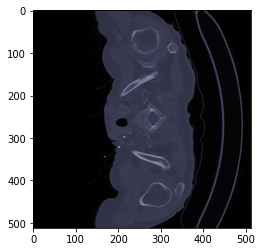

In [94]:

ds_resampled = dcmread(r"Output\dicom\0.dcm")
print(type(ds_resampled.pixel_array))
print(ds_resampled.pixel_array)
plt.imshow(ds_resampled.pixel_array, cmap=plt.cm.bone)

In [129]:
import os
from typing import Tuple
from pydicom import Dataset

def _get_dcm_paths_from_dir(dcm_dir: str) -> List[str]:
    paths = []
    for base, dirs, files in os.walk(dcm_dir):
        for file in files:
            paths.append(os.path.join(base, file))
    return paths

def _read_dcm_dataset(dcm_dir: str) -> Tuple[List[Dataset], np.ndarray]:
    dcm_paths = _get_dcm_paths_from_dir(dcm_dir)
    dcm_dataset = [dcmread(dcm_path) for dcm_path in dcm_paths]
    dcm_spacing = list(map(lambda x : np.float16(x), [*dcm_dataset[0].PixelSpacing, dcm_dataset[0].SliceThickness]))
    # dcm_pixel_array = np.transpose(np.array([dcm_data.pixel_array for dcm_data in dcm_dataset]), (1,2,0))
    dcm_pixel_array = np.array([dcm_data.pixel_array for dcm_data in dcm_dataset])

    return dcm_dataset, dcm_spacing, dcm_pixel_array

def _resample_dcm_pixel_array(img: np.ndarray, spacing: List[np.float16], new_spacing: List[np.float16]) -> np.ndarray:
    spacing = np.array(spacing, dtype=np.float16)
    resize_factor = spacing / new_spacing
    new_real_shape = img.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / img.shape
    new_spacing = spacing / real_resize_factor
    # Cubic spline, nearest neighbor for the boundary
    img = scipy.ndimage.interpolation.zoom(img, real_resize_factor, mode="nearest")
    return np.array(img, dtype=np.float16)

In [130]:
dcm_dataset, dcm_spacing, dcm_pixel_array = _read_dcm_dataset('Data/SampleDicom/1393/dicom')
new_dcm_spacing = [*dcm_spacing[:-1], 1]

In [148]:
np.unique(dcm_pixel_array[9] == dcmread(r'Data\SampleDicom\1393\dicom\1.3.12.2.1107.5.1.4.65305.30000020091412370754200016793.dcm').pixel_array)


array([ True])

In [149]:
resampled_dcm_pixel_array = _resample_dcm_pixel_array(dcm_pixel_array, dcm_spacing, new_dcm_spacing)


In [115]:
resampled_dcm_pixel_array[0].shape

(512, 330)

In [72]:
ds1 = dcmread(r'Data\SampleDicom\1393\dicom\1.3.12.2.1107.5.1.4.65305.30000020091412370754200016784.dcm')
ds1.pixel_array[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  4,  9, 15,
       29, 28, 31, 16, 33,  1, 38, 15, 48, 39,  0, 16, 34, 41, 18, 21, 18,
       16, 34, 21,  8, 39, 17, 23, 18, 17, 14, 33, 19, 21, 23, 23,  7, 29,
       45,  4, 43, 27, 33, 25, 16, 30, 35, 26, 21, 12, 29, 29, 23, 28, 20,
       18, 13, 32, 24, 51, 43, 11, 18, 42, 23, 36, 20, 26, 15, 16, 18, 38,
       15, 37,  6,  1, 39, 30, 20, 29, 20, 10, 53, 34, 22, 18, 23, 22, 21,
       30, 26, 29, 21,  6, 33, 21, 42, 21, 26, 28, 16, 12, 27, 23, 25, 25,
       41, 30, 30, 13, 17,  2, 28, 40, 16,  9, 39, 25, 33, 17, 23, 12,  9,
       40, 33, 30, 21, 21, 17, 17, 27, 13, 24, 33, 51, 28, 13, 15, 30, 38,
       24, 31, 34,  9, 10